# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('2016_to_2020_flight_null_values.csv')
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (39,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,...,Snow,Storm,Other Precipitation,Severe-Cold_Severity,Fog_Severity,Hail_Severity,Rain_Severity,Snow_Severity,Storm_Severity,Other Precipitation_Severity
0,0,2016,1,1,6,3,2016-01-06,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,1,1,7,4,2016-01-07,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016,1,1,8,5,2016-01-08,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016,1,1,9,6,2016-01-09,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016,1,1,10,7,2016-01-10,AA,19805,43,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginState', 'Dest', 'DestCityName', 'DestState', 'CRSDepTime',
       'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'Distance',
       'DepTimeLocal', 'DepTimeUTC', 'Severe-Cold', 'Fog', 'Hail', 'Rain',
       'Snow', 'Storm', 'Other Precipitation', 'Severe-Cold_Severity',
       'Fog_Severity', 'Hail_Severity', 'Rain_Severity', 'Snow_Severity',
       'Storm_Severity', 'Other Precipitation_Severity'],
      dtype='object')

In [4]:
df['is_late'] = df['ArrDelay'] > 0

In [5]:
df['is_late'].head()

0    False
1    False
2     True
3    False
4     True
Name: is_late, dtype: bool

In [6]:
 df['ArrDelay'].head()

0     -6.0
1    -12.0
2      7.0
3     -5.0
4    113.0
Name: ArrDelay, dtype: float64

In [20]:
np.corrcoef(df['ArrDelay'],df['DepDelay'])

array([[1.        , 0.90958691],
       [0.90958691, 1.        ]])

## Summary Statistics

In [7]:
df.shape

(8988665, 45)

In [8]:
# since our outcome features are 'DepDelay'and 'ArrDelay', we drop any rows without these inputs
df = df.dropna(subset=['DepDelay', 'ArrDelay'])
df.shape

(8988665, 45)

In [9]:
df[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,8.988665e+06,8.988665e+06
mean,1.011674e+01,5.441053e+00
std,4.078094e+01,4.534490e+01
min,-2.340000e+02,-2.380000e+02
25%,-5.000000e+00,-1.400000e+01
50%,-2.000000e+00,-5.000000e+00
75%,7.000000e+00,8.000000e+00
max,2.710000e+03,2.692000e+03


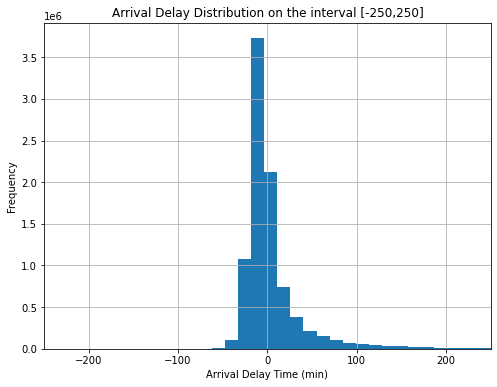

In [31]:
plt.figure(figsize=(8, 6))
df['ArrDelay'].hist(bins=200)
plt.xlim([-250,250])
plt.xlabel('Arrival Delay Time (min)')
plt.ylabel('Frequency')
plt.title('Arrival Delay Distribution on the interval [-250,250]')
plt.show()

In [62]:
# a = datetime.strptime('2018'+' '+'12', '%Y %m')
# datetime.strptime(monthDelay['Year']+' '+MonthDelay['Month'], '%Y %m')

datetime.datetime(2018, 12, 1, 0, 0)

In [68]:
monthDelay = df.groupby(['Year', 'Month'])['DepDelay', 'ArrDelay'].mean()
monthDelay = monthDelay.reset_index()

# monthDelay['year_month'] = [monthDelay['Year'], monthDelay['Month']]
# monthDelay

<ipython-input-68-5b944b4ba861>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthDelay = df.groupby(['Year', 'Month'])['DepDelay', 'ArrDelay'].mean()


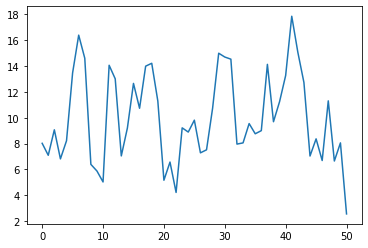

In [70]:
plt.plot(monthDelay.index, monthDelay.DepDelay)
plt.show()

In [8]:
noDelay = df.loc[df['DepDelay']<=0]
len(noDelay)/df.shape[0]

0.6322490287434417

In [9]:
noDelay = df.loc[df['ArrDelay']<=0]
len(noDelay)/df.shape[0]

0.637338726372705

In [14]:
yesDelay = df.loc[(df['ArrDelay']>0) & (df['DepDelay']>0)]
yesDelay[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,2.364521e+06,2.364521e+06
mean,4.598803e+01,4.473380e+01
std,6.692008e+01,6.706396e+01
min,1.000000e+00,1.000000e+00
25%,1.100000e+01,1.000000e+01
50%,2.600000e+01,2.400000e+01
75%,5.600000e+01,5.400000e+01
max,2.710000e+03,2.692000e+03


From analysis above, we see that about 63% of the total flights do not have delays. Out of the flights that do have delays, 50% delay under 26 minutes, 75% delay under 56 minutes. However, there are some very large values, as the largest being 2700 minutes, which is about 45 hours. To see how many of these large values there are and whether they are outliers, we do further analysis as the following:

In [15]:
delay2000 = df.loc[df['DepDelay']>2000][['DepDelay','ArrDelay']]
len(delay2000)

5

In [16]:
delay1000 = df.loc[df['DepDelay']>1000][['DepDelay','ArrDelay']]
len(delay1000)

850

In [17]:
delay500 = df.loc[df['DepDelay']>500][['DepDelay','ArrDelay']]
len(delay500)

7438

In [18]:
len(delay500)/len(yesDelay)

0.003145668826794095

In [20]:
delay250 = df.loc[df['DepDelay']>250][['DepDelay','ArrDelay']]
len(delay250)/len(yesDelay)

0.014279424881403041

Only 1% of the total delayed flights have delay time greater than 250 minutes. So let's go with the a short delay subset of delay time between 0 and 250 min.

## Plotting

<AxesSubplot:>

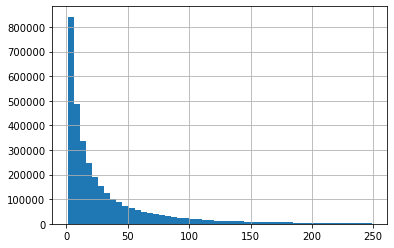

In [23]:
shortDelay = df.loc[(df['DepDelay']>0) & (df['DepDelay']<=250)]
shortDelay['DepDelay'].hist(bins=50)

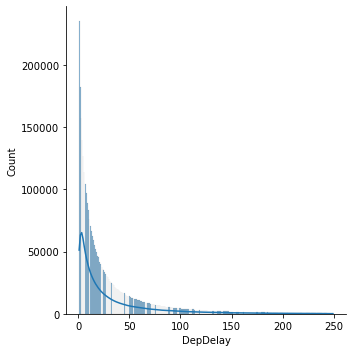

In [24]:
sns.displot(shortDelay['DepDelay'], kde=True)

<AxesSubplot:xlabel='DepDelay', ylabel='Count'>

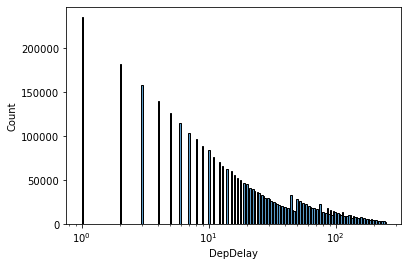

In [27]:
sns.histplot(
    shortDelay,
    x='DepDelay', 
    log_scale=True
)

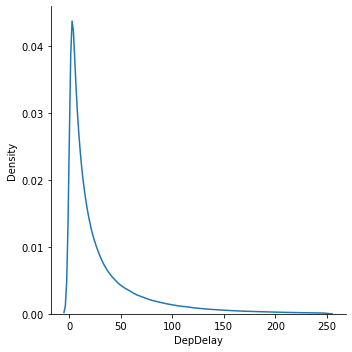

In [28]:
sns.displot(
    shortDelay,
    x='DepDelay', 
    kind = 'kde'
    )

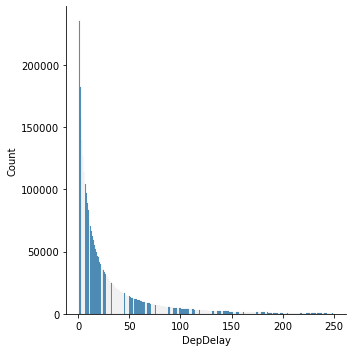

In [29]:
sns.displot(
    shortDelay,
    x='DepDelay', 
    kind = 'hist'
    )

## Visualize features

### Month

<AxesSubplot:>

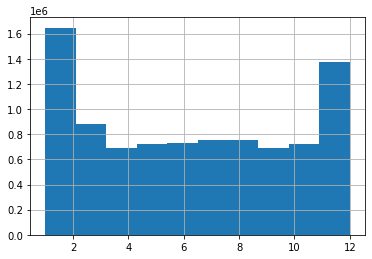

In [31]:
df.Month.hist()

There are more flights during the Christmas times.

In [11]:
df_months = df.groupby(['Month'])['DepDelay', 'ArrDelay', 'is_late'].mean()
df_months

<ipython-input-11-84d13e640b7e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_months = df.groupby(['Month'])['DepDelay', 'ArrDelay', 'is_late'].mean()


,DepDelay,ArrDelay,is_late
Month,,,
1,9.010543,3.822986,0.347084
2,9.355138,3.892860,0.345421
3,7.603704,2.231397,0.334549
4,9.552098,4.888314,0.352610
5,10.872623,6.830009,0.381915
6,15.207542,11.739345,0.432654
7,15.088872,11.430792,0.420381
8,13.323578,9.385171,0.403010
9,6.736964,1.987697,0.314803


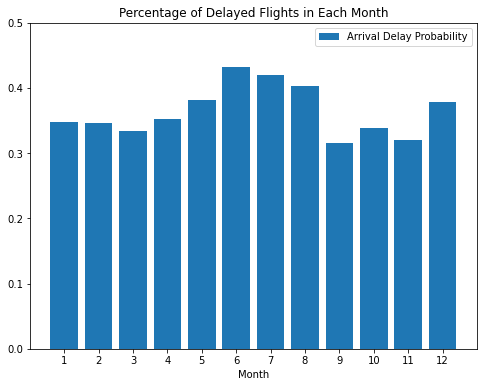

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(df_months.index,df_months['is_late'],label='Arrival Delay Probability')
plt.xticks(df_months.index)
plt.ylim([0,0.5])
plt.title('Percentage of Delayed Flights in Each Month')
plt.xlabel('Month')
plt.legend()
plt.show()

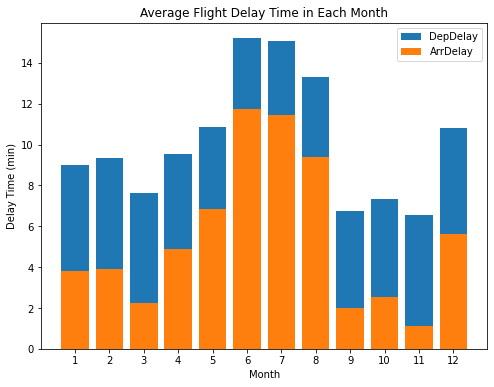

In [46]:
plt.figure(figsize=(8, 6))
plt.bar(df_months.index,df_months['DepDelay'],label='DepDelay')
plt.bar(df_months.index,df_months['ArrDelay'],label='ArrDelay')
plt.xticks(df_months.index)
plt.xlabel('Month')
plt.ylabel('Delay Time (min)')
plt.title('Average Flight Delay Time in Each Month')
plt.legend()
plt.show()

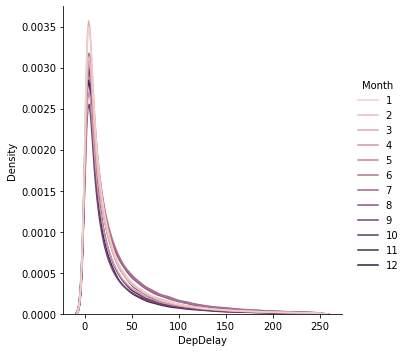

In [36]:
sns.displot(
    shortDelay,
    x='DepDelay', hue='Month',
    kind = 'kde',
)

<AxesSubplot:xlabel='Month', ylabel='DepDelay'>

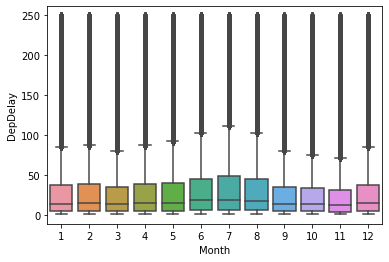

In [38]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Month"
)

### Airlines

In [42]:
# airline_codes = df['Reporting_Airline'].unique()
# airline_codes

array(['AA', 'AS', 'B6', 'DL', 'VX', 'WN', 'UA', 'OO', 'F9', 'HA', 'NK',
       'EV', '9E', 'G4', 'MQ', 'OH', 'YV', 'YX'], dtype=object)

In [12]:
# airline_names = ['American Airlines', 'Alaska Airlines', 'JetBlue', 'Delta', 'Virgin America', 'Southwest Airlines', 'United Airlines', 'SkyWest Airlines', 'Frontier Airlines', 'Hawaiian Airlines', 'Spirit Airlines', 'EVA Air']
# len(airline_names)

12

<AxesSubplot:>

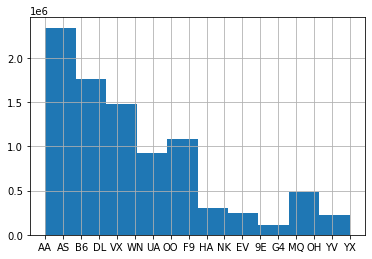

In [32]:
df.Reporting_Airline.hist()

In [14]:
df_airlines = df.groupby(['Reporting_Airline'])['DepDelay', 'ArrDelay','is_late'].mean()
df_airlines

<ipython-input-14-49d027a35496>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_airlines = df.groupby(['Reporting_Airline'])['DepDelay', 'ArrDelay','is_late'].mean()


,DepDelay,ArrDelay,is_late
Reporting_Airline,,,
9E,8.771957,4.156782,0.282428
AA,10.457406,6.849944,0.396722
AS,4.143930,0.979242,0.372689
B6,18.754790,13.362398,0.428647
DL,8.225470,1.095638,0.287869
EV,11.943832,8.746753,0.363731
F9,14.529212,8.693265,0.394183
G4,5.457852,3.684889,0.335294
HA,7.953728,4.639431,0.424179


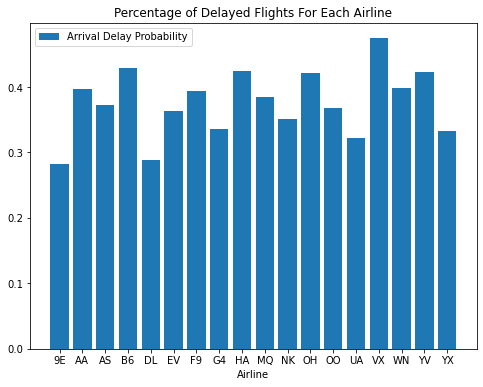

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(df_airlines.index,df_airlines['is_late'],label='Arrival Delay Probability')
plt.xlabel('Airline')
plt.title('Percentage of Delayed Flights For Each Airline')
plt.legend()
plt.show()

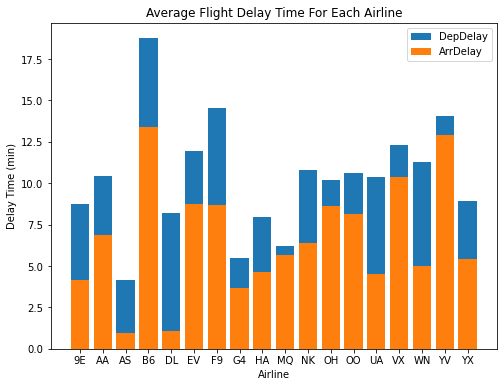

In [54]:
plt.figure(figsize=(8, 6))
plt.bar(df_airlines.index,df_airlines['DepDelay'],label='DepDelay')
plt.bar(df_airlines.index,df_airlines['ArrDelay'],label='ArrDelay')
plt.xlabel('Airline')
plt.ylabel('Delay Time (min)')
plt.title('Average Flight Delay Time For Each Airline')
plt.legend()
plt.show()

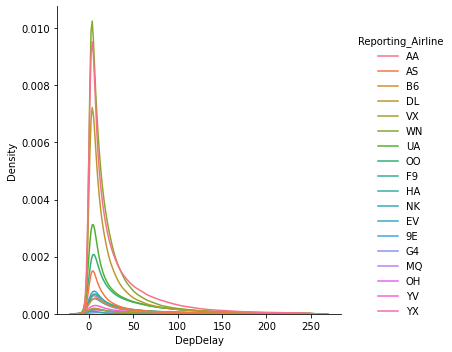

In [37]:
# Not good
# sns.displot(
#     shortDelay,
#     x='DepDelay', hue='Reporting_Airline',
#     kind = 'kde',
# )

<AxesSubplot:xlabel='Reporting_Airline', ylabel='DepDelay'>

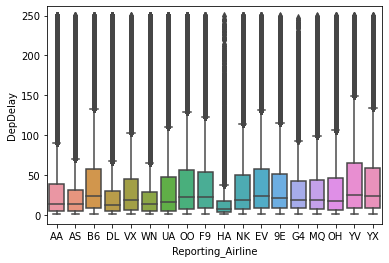

In [39]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Reporting_Airline"
)

### Airports

<AxesSubplot:>

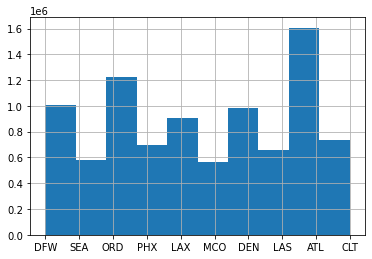

In [33]:
df.Origin.hist()

In [17]:
df_airports = df.groupby(['Origin'])['DepDelay', 'ArrDelay','is_late'].mean()
df_airports

<ipython-input-17-353925c2aebd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_airports = df.groupby(['Origin'])['DepDelay', 'ArrDelay','is_late'].mean()


,DepDelay,ArrDelay,is_late
Origin,,,
ATL,9.038966,3.033865,0.310175
CLT,9.616290,6.320884,0.388548
DEN,10.245567,5.331973,0.362860
DFW,11.484522,8.933954,0.406508
LAS,9.954285,4.582379,0.364577
LAX,10.327301,3.957927,0.362786
MCO,12.067082,6.766910,0.351957
ORD,12.434429,9.160639,0.397756
PHX,8.019887,3.383132,0.357315


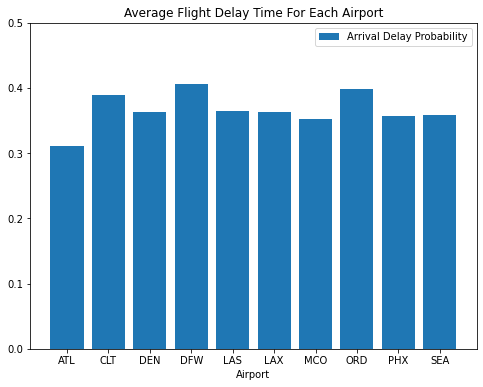

In [51]:
plt.figure(figsize=(8, 6))
plt.bar(df_airports.index,df_airports['is_late'],label='Arrival Delay Probability')
plt.ylim([0,0.5])
plt.xlabel('Airport')
plt.title('Average Flight Delay Time For Each Airport')
plt.legend()
plt.show()

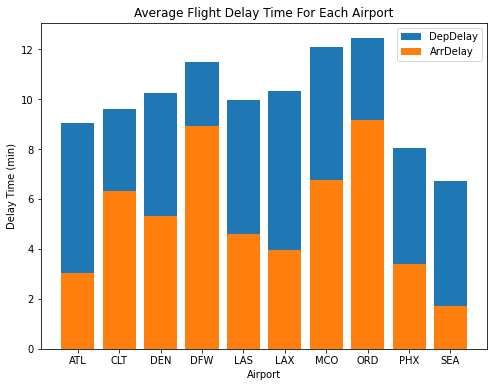

In [52]:
plt.figure(figsize=(8, 6))
plt.bar(df_airports.index,df_airports['DepDelay'],label='DepDelay')
plt.bar(df_airports.index,df_airports['ArrDelay'],label='ArrDelay')
plt.xlabel('Airport')
plt.ylabel('Delay Time (min)')
plt.title('Average Flight Delay Time For Each Airport')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

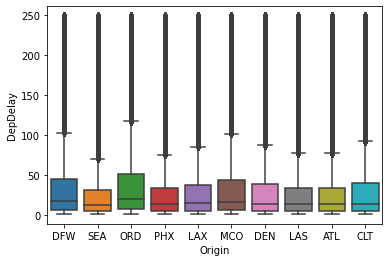

In [42]:
sns.boxplot(
    data=shortDelay,
    y="DepDelay", x="Origin"
)